In [2]:
import pandas as pd
from scipy.stats import ttest_ind
from helpers import print_group_stats, plot_histograms

In [3]:
# Load data from CSV
data = pd.read_csv('data/ab_test_data.csv')

# Split data into control and variant groups
control = data[data['group'] == 'control']
test = data[data['group'] == 'test']

print(f"Control Group Size = {len(control)}")
print(f"Test Group Size = {len(test)}")

Control Group Size = 60000
Test Group Size = 60000


In [4]:
# Calculate stats
for name, grp in zip(["Control", "Test"], [control, test]):
    print(f"--{name}--")
    print_group_stats(grp)
    print('')

--Control--
Total Clicks = 10303.0
Total Views = 297144.0
Avg views per user = 4.9524
Clicks per user = 0.17171666666666666
CTR = 3.4673424332983336%
----

--Test--
Total Clicks = 11620.0
Total Views = 301785.0
Avg views per user = 5.02975
Clicks per user = 0.19366666666666665
CTR = 3.8504233146113953%
----



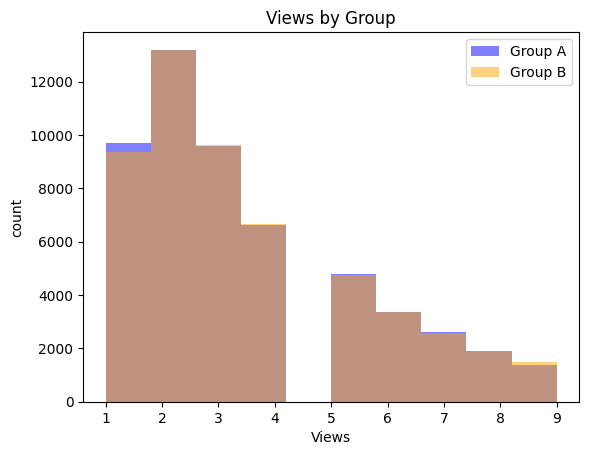

In [13]:
plot_histograms(control[control['views']<10]['views'], test[test['views']<10]['views'], density=False)

In [6]:
# Conduct a two-tailed t-test
ts, pv = ttest_ind(control['clicks'], test['clicks'], equal_var=False)

# Print results
print(f"T-statistic: {ts:.3f}")
print(f"P-value: {pv:.8f}")
if pv < 0.05:
    print("Result is statistically significant")
else:
    print("Result is not statistically significant")

T-statistic: -8.048
P-value: 0.00000000
Result is statistically significant
